In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#Importing these libraries allows for the manipulation of arrays, graph plotting and curve fitting
from scipy import asarray as ar,exp
#?Converts data into an array for exponential-like model
from sklearn.linear_model import LinearRegression
#Linear regression package
from sklearn.metrics import mean_squared_error, r2_score
from array import array

In [2]:
def linear(m, x, b):
    'Will return a slope m and y-intercept b for given values of x sent to the function'
    return m*x + b
def exponential(x, a, k, b):
    ''''Will return the function y = a exp(k*x) + b for any data set x sent to the function'''
    return a*np.exp(k*x) + b
#first order kinetics
def gauss_function(x,a1,b1,c1,o):
    'Will return a normal distribution curve for a data set x and constants a, b, and c'
    return a1*np.exp(-(x-b1)**2/(2*c1**2)) + o
def gauss_function_ext(x,a1,a2,b1,b2,c1,c2,o):
    'Will return two normal distribution curves for a data set x and constants a, b, and c'
    return a1*np.exp(-(x-b1)**2/(2*c1**2))+a2*np.exp(-(x-b2)**2/(2*c2**2)) + o
#c = sigma
#would like to know when to specifically define mean and sigma

# Linear Data Set Example

Text(0.5, 0, 'Glucose Concentration (mM)')

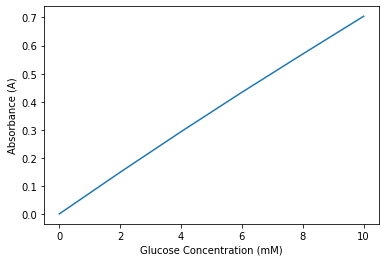

In [3]:
conc, absorb = np.loadtxt("lineardataset.txt", usecols=(0,1), unpack = True)
plt.figure(1)
plt.plot(conc, absorb)
plt.ylabel("Absorbance (A)")
plt.xlabel("Glucose Concentration (mM)")
#I loaded data from a txt file and designated the x and y values of data as an array
#(unpack = true) allows me to designate x, y at the beginning
#I labeled the y and x axis

predicted y values:
[[0.00828571]
 [0.14857143]
 [0.28885714]
 [0.42914286]
 [0.56942857]
 [0.70971429]]
intercept: [0.00828571]
slope: [[0.07014286]]
R squared value: 0.9996384266250692


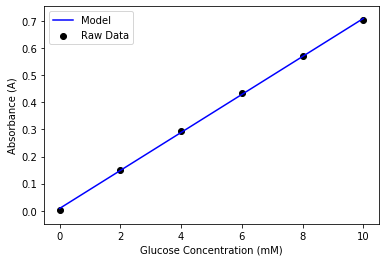

In [4]:
#Setting up a linear model to fit the data
#Turning original variables into arrays
x = np.array([conc]).reshape((-1, 1))
#x array is required to be 2-D (aka have one column and as many rows as necessary to "work" with y)
y = np.array([absorb]).reshape((-1, 1))
#The computer didn't like when I didn't also reshape the y variables, but based on the tutorial, not sure why this is required
#Generally think it changes the amount of elements that you get??
#Creating a linear regression object
lr = LinearRegression()
#Telling model to use the given data
lr.fit(x, y)
#Making predictions with the data
y_predict = lr.predict(x)
print('predicted y values:', y_predict, sep='\n')
#Printing relevant coefficients and values of line
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)
r_sq = lr.score(x,y)
print('R squared value:', r_sq)
plt.scatter(x, y, color='black')
plt.plot(x, y_predict, color='blue', linewidth=1.5)
plt.legend(("Model", "Raw Data"))
plt.ylabel("Absorbance (A)")
plt.xlabel("Glucose Concentration (mM)")

plt.show()
#curve_fit = can put multiple response (y) points at one x-axis point
#test this
#Resource for replicating LINEST function
#look more into linear regression package
#perr = standard deviation
#Need to know how to grab numbers and multiply/divide accordingly
#Next I want to have calculations of standard deviation (will need a replicate set of data), %RSD, and confidence interval for adding error bars; basically all calculations for AFMs

In [15]:
yint = lr.intercept_[0]
print("y intercept is ", yint)
#before adding the [0], saved it as an array that has one axis and one data point

y intercept is  0.00828571428571434


# Exponential Data Set Example

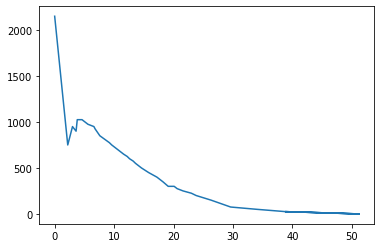

In [5]:
#Loading up 2021 dataset file with minimal glancing at model fitting lab
#Always check the original data file in Jupyter if error messages pop up; could be an unnecessary space or character causing loading problems
#Loading in data as arrays requires 'unpack = true' command because...
raw_time, raw_volume = np.loadtxt("Mentos and Coke 2-2021.csv", delimiter=',', usecols=(0,1), unpack = True)
plt.plot(raw_time,raw_volume)

Text(0.5, 0, 'Time (sec)')

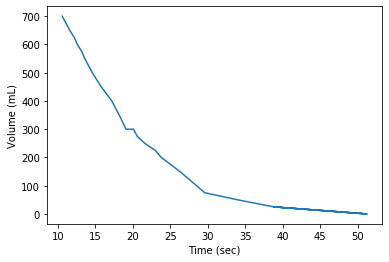

In [6]:
#Cutting off data not relevant to model fitting using index function
#Re-name arrays to represent new graph
index = 12
plt.plot(raw_time[index:], raw_volume[index:])
time = raw_time[index:]
volume = raw_volume[index:]
plt.ylabel("Volume (mL)")
plt.xlabel("Time (sec)")

[-2.01256031e-20  9.99999520e-01  3.46428834e+02]
[ 1.93870575e+03 -8.91092286e-02 -3.32176598e+01]
[5.57348729e+01 2.85122981e-03 8.61185568e+00]


C:\Users\krbar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


Text(0.5, 0, 'Parameters of Model Equation')

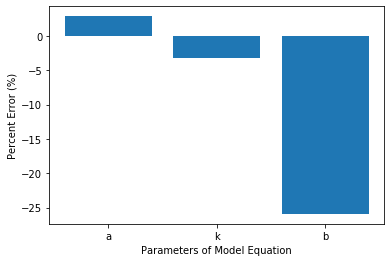

In [7]:
popt_first, pcov_first = curve_fit(exponential, time, volume)
print(popt_first)
#First line
popt_first, pcov_first = curve_fit(exponential, time, volume, p0=(750, -1, 0))
print(popt_first)
#Second line
#With these commands, I ask the computer to give optimized parameters for the fitting of my raw data to an exponential model
#The first printed line delivers the computer's predictions for a, k, and b based on the computer's search algorith. These 
    #numbers (especially a) are a bit out of range based on my raw data; the computer most likely picked a far away point on
    #the parameter search surface from the real value and "rolled downhill" when picking the predicted values
    #popt = sum of squares residuals minimized
#a = the top of the curve on the y-axis (defines shape), k = rate of growth (+) or decay (-) (defines overall curvature), b = where the baseline hits
#The second printed line represents the computer's new predictions for a, k, and b with my restrictions. The a parameter 
    #becomes slightly more reasonable.
perr_first = np.sqrt(np.diag(pcov_first))
#Computes one standard deviation (?absolute) of the parameters
#Look up commands for computing  more standard deviations? Related to confidence intervals?
print(perr_first)
#Third line
plt.bar(('a','k','b'), perr_first/popt_first*100)
#Now we calculate the uncertainty (relative error) of the a, k, and b values in the exponential decay and place the percent error based on the real values in bar graph form (allowing us to compare to base values)
plt.ylabel("Percent Error (%)")
plt.xlabel("Parameters of Model Equation")
#overflow = encountered a big number; then went a different direction

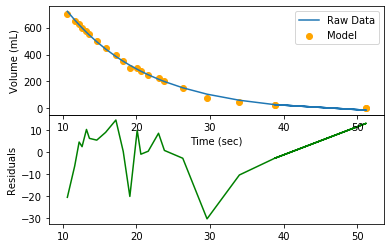

In [8]:
#Directly comparing raw data and model with residuals
plt.subplot(212)
#The plt.subplot functions allow the graphs to be stacked in a certain arrangement and to share an x-axis
#212 = 2 rows, 1 column, work on the second plot
#The top plot overlays the generated expontential model (based on parameters set above in the previous cell) on the raw data graph
plt.plot(time, volume-exponential(time, popt_first[0],popt_first[1], popt_first[2]),'g')
#The bottom plot (green color defined by 'g') is the residual plot based on the model and raw data (data generated by above line)
plt.ylabel("Residuals")
plt.subplot(211, sharex=plt.gca())
#now working on the first plot
#gca = 
plt.scatter(time,volume, color='orange')
plt.plot(time, exponential(time, popt_first[0],popt_first[1], popt_first[2]))
plt.legend(("Raw Data", "Model"))
plt.ylabel("Volume (mL)")
plt.xlabel("Time (sec)")
plt.subplots_adjust(hspace=0)

# Gaussian Data Set Example

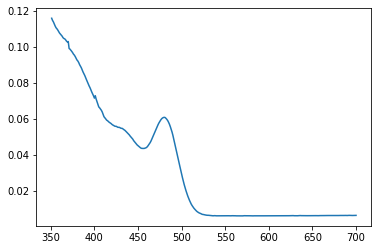

In [9]:
#Remember model fitting link I have
wvlngth, intensity = np.loadtxt("30s031320.txt", usecols=(0,1), unpack = True)
index = 350
plt.plot(wvlngth[:index], intensity[:index])

[1.19725984e-01 3.84588012e-02 3.12503118e+02 4.80428715e+02
 8.46752592e+01 1.38168875e+01 5.38158698e-03]
[3.01979144e-03 6.87647959e-04 4.62311309e+00 2.41934146e-01
 2.46453025e+00 3.11253810e-01 2.08086823e-04]


Text(0.5, 0, 'Parameters of Model Equation')

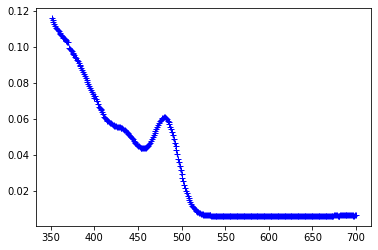

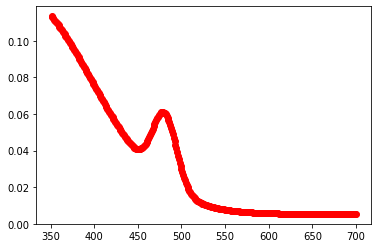

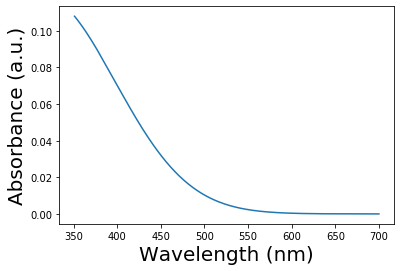

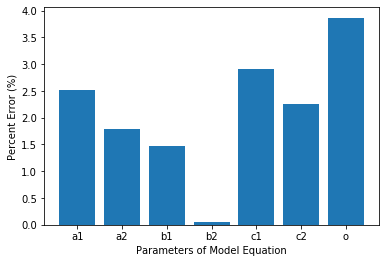

In [12]:
x=ar(wvlngth[:index])
y=ar(intensity[:index])
n=len(x)
#the number of data points

def gauss_function(x,a1,a2,b1,b2,c1,c2,o):
    return a1*np.exp(-(x-b1)**2/(2*c1**2))+a2*np.exp(-(x-b2)**2/(2*c2**2)) + o
#c = sigma
#used multiple variables because we expected multiple Gaussian peaks
#would like to know when to specifically define mean and sigma

popt,pcov = curve_fit(gauss_function, x, y, p0 = [0.12, 0.05, 350, 480, 50, 1, 0])
#defining all constants, not x
#notice x and y are the variables I defined above
#p0 = initial guess for the parameters
#pcov = estimated covariance of popt (the estimate)

plt.figure(1)
plt.plot(x,y,'b+:',label='data')
#This is plotting the original data with the new x and y defined variables


plt.figure(2)
plt.plot(x, gauss_function(x, *popt), 'ro:', label='fit')
#optimizes parameter values so the sum of squared residuals is minimized (if y data was subtracted)
#The fit of the data assuming multiple Gaussians

#can redfine x axis; change the index
plt.figure(3)
plt.plot(x, popt[0]*np.exp(-(x-popt[2])**2/(2*popt[4]**2)))
#I think this is optimizing a1, b1, and c1 specifically and focusing on the curve itself
#I couldn't just use gauss_function because it defines all variables; I specifically wanted a1, b1, c1
plt.ylabel("Absorbance (a.u.)", fontsize=20)
plt.xlabel("Wavelength (nm)", fontsize=20)


popt_sec, pcov_sec = curve_fit(gauss_function, x, y, p0 = [0.12, 0.05, 350, 480, 50, 1, 0])
perr_sec = np.sqrt(np.diag(pcov_sec))
#Now I can find relative error with estimated parameters and their standard deviations
print(popt_sec)
print(perr_sec)
plt.figure(4)
plt.bar(('a1','a2','b1','b2','c1','c2','o'), perr_sec/popt_sec*100)
plt.ylabel("Percent Error (%)")
plt.xlabel("Parameters of Model Equation")

#Now want to compare to "Model" way of fitting a Gaussian function
#learning how numpy arrays and broadcasting works (comp sci theory)